In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [32]:
u_train = np.load('u_train.npy')
output_train = np.load('output_train.npy')
u_test = np.load('u_test.npy')

In [33]:
def create_arx_regressor(y, u, n, m, d):
    N = len(y)
    p = max(n, d + m)
    print(p)
    
    X = []
    Y = []
    
    for k in range(p, N):
        # Past values of y(k), autoregressive part
        y_lags = [y[k - i] for i in range(1, n+1)]
        
        # Past values of u(k), exogenous input part
        u_lags = [u[k - d - j] for j in range(m + 1)]
        
        # Combine both sets of lags into a single row
        X.append(y_lags + u_lags)
        Y.append(y[k])
    return np.array(X), np.array(Y)

In [70]:
n, m, d = 3, 2, 4
X_train, Y_train = create_arx_regressor(output_train, u_train, n, m, d)
test_size = int(0.3*2034)
X_train_split = X_train[:-test_size] 
Y_train_split = Y_train[:-test_size]  

X_val_split = X_train[-test_size:]  
Y_val_split = Y_train[-test_size:]  
print("Original set X shape:", X_train.shape)
print("Training set X shape:", X_train_split.shape)
print("Training set Y shape:", Y_train_split.shape)
print("Validation set X shape:", X_val_split.shape)
print("Validation set Y shape:", Y_val_split.shape)
print(X_train[1422:1428])
print("\n")
print(X_val_split[0:8])
print("\n")
print(X_train_split[1422:])
print("\n")

6
Original set X shape: (2034, 6)
Training set X shape: (1424, 6)
Training set Y shape: (1424,)
Validation set X shape: (610, 6)
Validation set Y shape: (610,)
[[ 4.20580261  7.46217403  9.17840802 -5.         -5.         -5.        ]
 [ 1.20841746  4.20580261  7.46217403 -5.         -5.         -5.        ]
 [-0.61944421  1.20841746  4.20580261 -5.         -5.         -5.        ]
 [-1.08862488 -0.61944421  1.20841746 -5.         -5.         -5.        ]
 [-0.25254548 -1.08862488 -0.61944421 -5.         -5.         -5.        ]
 [ 0.71115316 -0.25254548 -1.08862488 -5.         -5.         -5.        ]]


[[-0.61944421  1.20841746  4.20580261 -5.         -5.         -5.        ]
 [-1.08862488 -0.61944421  1.20841746 -5.         -5.         -5.        ]
 [-0.25254548 -1.08862488 -0.61944421 -5.         -5.         -5.        ]
 [ 0.71115316 -0.25254548 -1.08862488 -5.         -5.         -5.        ]
 [ 0.75148893  0.71115316 -0.25254548  5.         -5.         -5.        ]
 [-0.5514246

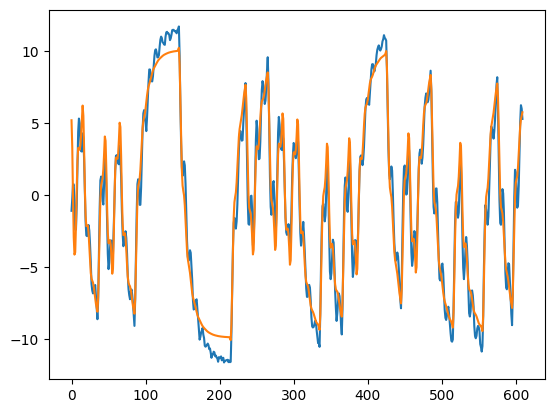

Validation set R2 score: 0.9583203363931486


In [75]:
lr = LinearRegression()
lr.fit(X_train_split, Y_train_split)
y_pred_val_OLS = []
y_prev = list(Y_train_split[-n:])
for k in range(test_size):
    u_lags = [u_train[1430 + k - d - j] for j in range(m + 1)]
    y_pred = lr.predict([y_prev + u_lags])
    y_pred_val_OLS.append(y_pred[0])
    aux1= y_prev[0]
    aux2 = y_prev[1]
    aux3 = y_prev[2]
    y_prev[0] = y_pred[0]
    y_prev[1] = aux1
    y_prev[2] = aux2
plt.plot(Y_val_split, label='True')
plt.plot(y_pred_val_OLS, label='Predicted')
plt.show()
print("Validation set R2 score:", r2_score(y_pred_val_OLS, Y_val_split))

In [22]:
for k in range(len(u_test)):
    # Create the regressor for the current test sample
    if k < d + m:
        # If not enough data for lagged inputs, skip (this happens at the beginning of test set)
        continue
    
    # Predict using the past values of y and u
    y_lags = [-y_prev[-i] for i in range(1, n + 1)]
    u_lags = [u_test[k - d - j] for j in range(m + 1)]
    
    X_test_sample = np.array(y_lags + u_lags).reshape(1, -1)
    
    # Predict the next output
    y_next = model.predict(X_test_sample)[0]
    y_pred_test.append(y_next)
    
    # Update the previous values of y for the next iteration
    y_prev.append(y_next)

# Extract the last 400 predictions (indices 110 to 509)
y_pred_test_last_400 = np.array(y_pred_test[-400:])

# Save the predictions in the required format
np.save('y_pred_test_last_400.npy', y_pred_test_last_400)

plt.plot(y_pred_test_last_400)

NameError: name 'y_train' is not defined